In [4]:
import warnings; 
warnings.simplefilter('ignore')

# 0. Install and Import Dependencies

In [ ]:
!pip install pystan
!pip install fbprophet

In [15]:
import pandas as pd
from fbprophet import Prophet

# 1. Read in Data and Process Dates

In [16]:
df = pd.read_csv('dataset.csv')

In [17]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [18]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [19]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# 2. Train Model

In [20]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

# 3. Forecast Away

In [21]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.014918,880.444611,4093.773843,3042.014918,3042.014918,-641.038712,-641.038712,-641.038712,469.792305,...,16.635346,16.635346,16.635346,-1127.466363,-1127.466363,-1127.466363,0.0,0.0,0.0,2400.976206
1,2018-01-02,3042.763893,697.305423,3891.708530,3042.763893,3042.763893,-651.183101,-651.183101,-651.183101,469.792305,...,-11.268085,-11.268085,-11.268085,-1109.707321,-1109.707321,-1109.707321,0.0,0.0,0.0,2391.580792
2,2018-01-03,3043.512868,851.617461,4025.724173,3043.512868,3043.512868,-625.359730,-625.359730,-625.359730,469.792305,...,-4.396566,-4.396566,-4.396566,-1090.755469,-1090.755469,-1090.755469,0.0,0.0,0.0,2418.153138
3,2018-01-04,3044.261843,837.124165,3966.094726,3044.261843,3044.261843,-578.413553,-578.413553,-578.413553,469.792305,...,22.481778,22.481778,22.481778,-1070.687635,-1070.687635,-1070.687635,0.0,0.0,0.0,2465.848290
4,2018-01-05,3045.010818,1002.745306,4041.553418,3045.010818,3045.010818,-614.421907,-614.421907,-614.421907,469.792305,...,-34.580721,-34.580721,-34.580721,-1049.633491,-1049.633491,-1049.633491,0.0,0.0,0.0,2430.588911


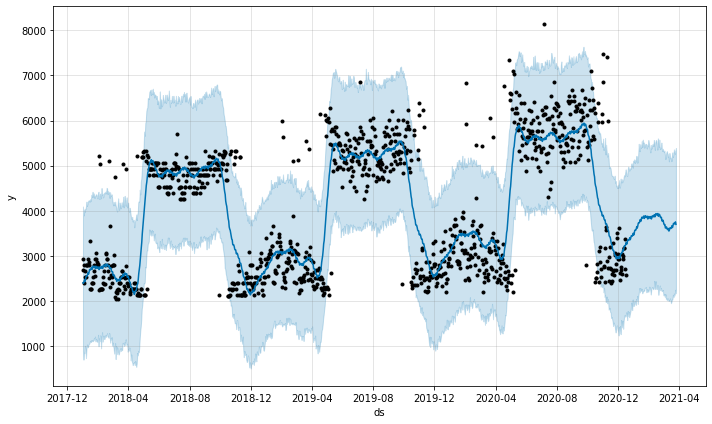

In [22]:
plot1 = m.plot(forecast)

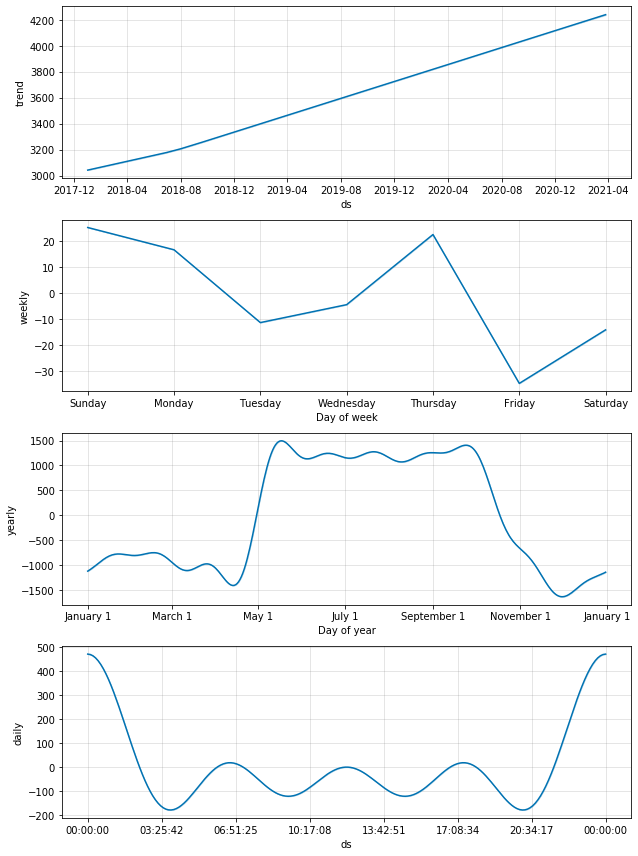

In [23]:
plt2 = m.plot_components(forecast)